<div style="text-align: right"> 06.12.2019</div>

***Name:*** Kaja Brink

# Hausaufgabe Blatt 7

## Pendel: Energie

In dieser Aufgabe werden wir erneut die Bewegungsgleichung eines Pendels numerisch lösen und dabei dieses mal die Energie des Systems betrachten. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Die nach dem Euler Verfahren diskretisierte Gleichungen lauten:

\begin{align*}
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{1} \\
        \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + 
        \omega\left(t\right) \cdot \Delta t \tag{2}
\end{align*}

Die potentielle Energie $E_p$ und die kinetische Energie $E_{kin}$ sind gegeben durch:
\begin{align*}
E_p &= m \cdot g \cdot L \left( 1 - \cos \varphi \right) \\
E_{kin} &= \frac{m}{2} v^2 = \frac{m}{2}L^2 \dot \varphi ^2
\end{align*}

Die konstante Gesamtenergie ist durch die potentielle Energie bei anfänglicher Auslenkung $\varphi_0$ gegeben
\begin{align*}
E = m \cdot g \cdot L\left(1-\cos \varphi_0\right). \tag{3}
\end{align*}



### 1. Numerische Integration
Auf Blatt 6 haben Sie die Pendelgleichungen (1 + 2) numerisch integriert. Der Code dafür steht in der folgenden Zelle. Führen Sie diesen aus, bevor Sie bei "2. Energie" weiterarbeiten. Hier haben wir $N=2000$ Zeitschritte, wobei $\Delta t=0.004$, $\omega(t=0)=0$ und $\varphi_0 = \varphi(t=0)=\pi/4$ sein soll. Die Länge des Pendels ist $L=1$, die Masse $m=1$ und $g$ die Erdbeschleunigung.  


In [1]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 2000 # Anzahl Zeitschritte

dt = 0.004 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N+1) # Zeit
rw = [0] # Liste für berechnete Winkelgeschwindigkeit
rphi = [np.pi/4] # Liste für berechnete Winkel


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    wtemp = w # Zwischenspeichern der Winkelgeschwindigkeit, damit phi nicht mit dem aktualisierten omega berechnet wird
    w = w - g/L*np.sin(phi)*dt # update omage
    rw.append(w) # speichere omega
    phi = phi+wtemp*dt # update phi
    rphi.append(phi) # speichere phi

In [2]:
x=2
for f in range (5):
    x=x+f
    print (x)     #kleine Hilfe für mich zum Verständnis ;)

2
3
5
8
12


## 2. Energie
**a)** Schreiben Sie eine Funktion, die Ihnen die potentielle, kinetische und gesamte Energie abhängig vom Winkel $\varphi$ und der Winkelgeschwindigkeit $\omega$ berechnet und zurück gibt.

In [3]:
Kin=[]
Pot=[]
G=[]
for s in range(N+1):
    Ekin=(m/2)*L**2*(rw[s])**2
    Epot=m*g*L*(1-np.cos(rphi[s]))
    Eg=Ekin+Epot
    Kin.append(Ekin)
    Pot.append(Epot)
    G.append(Eg)

Eges=m*g*L*(1-np.cos(np.pi/4))
print(Eges)

2.8732824765599685


**b)** Plotten Sie die kinetische, potentielle und gesamte Energie gegen die Zeit. Vergleichen Sie das Ergebnis mit der erwarteten gesamten Energie (Gleichung (3)). Warum sehen Sie eine Abweichung?

Benutzen Sie zum plotten einer horizontalen Linie `ax.hlines(value, xStart, xEnd)`, wobei `value` der y-Wert und `xStart` und `xEnd` die Anfangs- und End-Punkte der Linie sind.

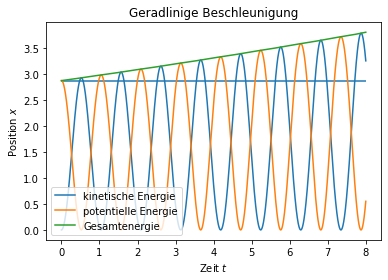

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hlines(Eges, 0, 8 )

ax.set_title("Geradlinige Beschleunigung")  # Titel
ax.plot(t, Kin, label='kinetische Energie')
ax.plot(t, Pot, label='potentielle Energie')
ax.plot(t, G, label='Gesamtenergie')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

plt.legend(loc=3)
plt.show()

In [ ]:
# Die Abweichung bei der Gesamtenergie entsteht durch die mithilfe der numerischen Integration erstellten
# arrays für Winkelgeschwindigkeit omega und Winkel phi. In der Python Aufgabe von Übungsblatt 6 war zu
# sehen, dass die Periodendauer des Pendels bei numerischer Integration abnimmt. Ein langsamer werdendes
# Pendel gibt Energie ab, der maximale Winkel omega blieb jedoch gleich. Somit erreicht das 
# Pendel trotz abnehmender Periodendauer die gleiche Amplitude. Dem System muss somit Energie zugeführt 
# werden, was im Graphen durch den Anstieg der Gesamgenergie zu sehen ist. 